# Crystal Structure Prediction Using Machine Learning

I am developing a machine learning model to predict crystal structures. This involves using computational algorithms to analyze atomic arrangements in crystalline solids, enabling insights into material properties and potential applications in material scienc.


In [2]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as ptl
import kagglehub
from tensorflow.keras.layers import Input

Importing unprocessed Dataset from Kaggle

In [3]:
DATA_URL = '../input/crystal-structure-classification/Crystal_structure.csv'
unprocessed_data = pd.read_csv(DATA_URL)
data = pd.read_csv(DATA_URL)
data.count()

Compound             5329
A                    5329
B                    5329
In literature        5329
v(A)                 5329
v(B)                 5329
r(AXII)(Å)           5329
r(AVI)(Å)            5329
r(BVI)(Å)            5329
EN(A)                5329
EN(B)                5329
l(A-O)(Å)            5329
l(B-O)(Å)            5329
ΔENR                 5329
tG                   5329
τ                    5329
μ                    5329
Lowest distortion    5329
dtype: int64

In [4]:
data.head(5)

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


# [](http://)Data Cleaning and Preprocessing
## Unnecessary Features
1. In Literature
2. Compound

In [5]:
data = data.drop(['In literature'], axis=1)
data = data.drop(['Compound'], axis=1)
data.columns

Index(['A', 'B', 'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)',
       'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ',
       'Lowest distortion'],
      dtype='object')

## Null Value Preprocessing

In [6]:
(data == "-").any()

A                    False
B                    False
v(A)                  True
v(B)                  True
r(AXII)(Å)           False
r(AVI)(Å)            False
r(BVI)(Å)            False
EN(A)                False
EN(B)                False
l(A-O)(Å)            False
l(B-O)(Å)            False
ΔENR                 False
tG                   False
τ                     True
μ                    False
Lowest distortion     True
dtype: bool

### 1. v(A) & v(B)

In [7]:
print((data["v(A)"] == "-").sum(), (data["v(B)"] == "-").sum())
print(((data["v(A)"] == "-").sum() and (data["v(B)"] == "-").sum()).sum())

1881 1881
1881


The missing values are the same for Vacancy A and B. There are 1881 rows where both v(A) and v(B) in undefined

In [8]:
print(data["v(A)"].unique())
print(data["v(B)"].unique())

['0' '-' '1' '3' '2' '4' '5']
['0' '-' '5' '3' '4' '2' '1']


To solve this we can treat the "Undefined" as a value-
We could one-hot encode the valencies and the undefined values will still be represented within the data.

In [9]:
vacancy_a = pd.get_dummies(data['v(A)'], prefix='v(A)=', prefix_sep="")
vacancy_b = pd.get_dummies(data['v(B)'], prefix='v(B)=', prefix_sep="")
data = pd.concat([data, vacancy_a, vacancy_b], axis=1)

In [10]:
data = data.drop(['v(A)'], axis=1)
data = data.drop(['v(B)'], axis=1)
data.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ', 'Lowest distortion',
       'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2', 'v(A)=3', 'v(A)=4', 'v(A)=5',
       'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2', 'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

### 2. τ

In [11]:
len(data["τ"].unique())

1608

In [12]:
data = data.drop(["τ"], axis=1)
data.columns

Index(['A', 'B', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)',
       'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'μ', 'Lowest distortion',
       'v(A)=-', 'v(A)=0', 'v(A)=1', 'v(A)=2', 'v(A)=3', 'v(A)=4', 'v(A)=5',
       'v(B)=-', 'v(B)=0', 'v(B)=1', 'v(B)=2', 'v(B)=3', 'v(B)=4', 'v(B)=5'],
      dtype='object')

### 3. Lowest distortion

In [13]:
(data["Lowest distortion"] == "-").sum()

53

Since the dash - it's only present in 53 rows we could safely remove these rows from the dataset, as it's approximately a 1% of the data. This can be used as unknown data and its values can be predicted later


## Change Categorical Data into Numerical

In [14]:
a_one_hot = pd.get_dummies(data['A'], prefix="A=", prefix_sep="")
b_one_hot = pd.get_dummies(data['B'], prefix="B=", prefix_sep="")
data = pd.concat([data, a_one_hot, b_one_hot], axis=1)

In [15]:
data = data.drop(["A"], axis=1)
data = data.drop(["B"], axis=1)

## Change Target Lowest Distortion into Categories


In [16]:
unknown_data = data[data["Lowest distortion"] == "-"]
data = data.drop(data[data["Lowest distortion"] == "-"].index)

In [17]:
class_names = data["Lowest distortion"].unique()
class_names

array(['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal'],
      dtype=object)

In [18]:
data["Lowest distortion"] = data["Lowest distortion"].astype('category')
data["Lowest distortion"] = data["Lowest distortion"].cat.codes

## Split the train/test/unknown data¶


In [19]:
len(data), len(unknown_data)

(5276, 53)

In [20]:
features = data.drop(labels=["Lowest distortion"], axis=1)
target = data["Lowest distortion"]

In [21]:
SEED = 0
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

#Finally, Preprocessed Dataset

### **Crystal Structure Dataset Parameters**
| Parameter                | Description                                                             | Type          |
|--------------------------|-------------------------------------------------------------------------|---------------|
| **A**                     | First element in the compound                                           | Categorical   |
| **B**                     | Second element in the compound                                          | Categorical   |
| **r(AXII)(Å)**            | Radius or bond distance for element A in Ångströms                      | Numeric       |
| **r(AVI)(Å)**             | Radius or bond distance for element B in Ångströms                      | Numeric       |
| **r(BVI)(Å)**             | Radius or bond distance for the B site in Ångströms                     | Numeric       |
| **EN(A)**                 | Electronegativity of element A                                          | Numeric       |
| **EN(B)**                 | Electronegativity of element B                                          | Numeric       |
| **l(A-O)(Å)**             | Bond length between A and oxygen in Ångströms                          | Numeric       |
| **l(B-O)(Å)**             | Bond length between B and oxygen in Ångströms                          | Numeric       |
| **ΔENR**                  | Difference in electronegativity between A and B                         | Numeric       |
| **v(A)**                  | Valency of element A (categorical; one-hot encoded for different values)| Categorical   |
| **v(B)**                  | Valency of element B (categorical; one-hot encoded for different values)| Categorical   |
| **Lowest distortion**     | Crystal structure classification (e.g., cubic, orthorhombic, rhombohedral, tet | Categorical   |
tetragonal) | Cic         |
------|----------------------


In [43]:
data

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,...,B=Ti,B=Tl,B=Tm,B=U,B=V,B=W,B=Y,B=Yb,B=Zn,B=Zr
0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000,...,False,False,False,False,False,False,False,False,False,False
1,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571,...,False,False,False,False,False,False,False,False,False,False
2,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714,...,False,False,False,False,False,False,False,False,False,False
3,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429,...,False,False,False,False,False,False,False,False,False,False
4,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857,...,False,False,False,False,False,True,False,False,False,False
5325,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857,...,False,False,False,False,False,False,True,False,False,False
5326,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571,...,False,False,False,False,False,False,False,True,False,False
5327,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# Get the column names (features) of the dataset
feature_names = data.columns.tolist()

# Print all feature names
print("Feature Names in the Dataset:")
for feature in feature_names:
    print(feature)

Feature Names in the Dataset:
r(AXII)(Å)
r(AVI)(Å)
r(BVI)(Å)
EN(A)
EN(B)
l(A-O)(Å)
l(B-O)(Å)
ΔENR
tG
μ
Lowest distortion
v(A)=-
v(A)=0
v(A)=1
v(A)=2
v(A)=3
v(A)=4
v(A)=5
v(B)=-
v(B)=0
v(B)=1
v(B)=2
v(B)=3
v(B)=4
v(B)=5
A=Ac
A=Ag
A=Al
A=As
A=Au
A=B
A=Ba
A=Be
A=Bi
A=Ca
A=Cd
A=Ce
A=Co
A=Cr
A=Cs
A=Cu
A=Dy
A=Er
A=Eu
A=Fe
A=Ga
A=Gd
A=Ge
A=Hf
A=Hg
A=Ho
A=In
A=Ir
A=K
A=La
A=Li
A=Lu
A=Mg
A=Mn
A=Mo
A=Na
A=Nb
A=Nd
A=Ni
A=Np
A=Os
A=Pa
A=Pb
A=Pd
A=Pm
A=Pr
A=Pt
A=Pu
A=Rb
A=Re
A=Rh
A=Ru
A=Sb
A=Sc
A=Si
A=Sm
A=Sn
A=Sr
A=Ta
A=Tb
A=Tc
A=Te
A=Th
A=Ti
A=Tl
A=Tm
A=U
A=V
A=W
A=Y
A=Yb
A=Zn
A=Zr
B=Ac
B=Ag
B=Al
B=As
B=Au
B=B
B=Ba
B=Be
B=Bi
B=Ca
B=Cd
B=Ce
B=Co
B=Cr
B=Cs
B=Cu
B=Dy
B=Er
B=Eu
B=Fe
B=Ga
B=Gd
B=Ge
B=Hf
B=Hg
B=Ho
B=In
B=Ir
B=K
B=La
B=Li
B=Lu
B=Mg
B=Mn
B=Mo
B=Na
B=Nb
B=Nd
B=Ni
B=Np
B=Os
B=Pa
B=Pb
B=Pd
B=Pm
B=Pr
B=Pt
B=Pu
B=Rb
B=Re
B=Rh
B=Ru
B=Sb
B=Sc
B=Si
B=Sm
B=Sn
B=Sr
B=Ta
B=Tb
B=Tc
B=Te
B=Th
B=Ti
B=Tl
B=Tm
B=U
B=V
B=W
B=Y
B=Yb
B=Zn
B=Zr


## Now, Building a Prediction Model

## Random Forest Algorithm

In [24]:
forest = RandomForestClassifier(n_estimators=1000, random_state=SEED, verbose=1)
forest = forest.fit(X_train, y_train)
forest.verbose = 0 # silence further control msg

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    5.5s


In [25]:
accuracy = round(forest.score(X_test, y_test) * 100, 2)
print(f"Accuracy of the random forest: {accuracy}%")

Accuracy of the random forest: 79.26%


## Deep Neural Network Approah

In [26]:
input_layer = Input(shape=(len(X_train.columns),))  # Input shape based on the number of features
BATCH_SIZE = 16
SEED = 0
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [27]:
model_1 = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(500, activation='relu', name='layer1'),
    tf.keras.layers.Dropout(0.4, name='drop1'),
    tf.keras.layers.Dense(400, activation='relu', name='layer2'),
    tf.keras.layers.Dropout(0.4, name='drop2'),
    tf.keras.layers.Dense(300, activation='relu', name='layer3'),
    tf.keras.layers.Dropout(0.4, name='drop3'),
    tf.keras.layers.Dense(100, activation='relu', name='layer4'),
    tf.keras.layers.Dropout(0.4, name='drop4'),
    tf.keras.layers.Dense(4, activation='softmax', name='output_layer')
], name='Model_1')

In [28]:
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
    metrics=["accuracy"]
)

I0000 00:00:1734200444.957752      94 service.cc:145] XLA service 0x7d9f0800c0b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734200444.957807      94 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734200444.957810      94 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1734200453.405558      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


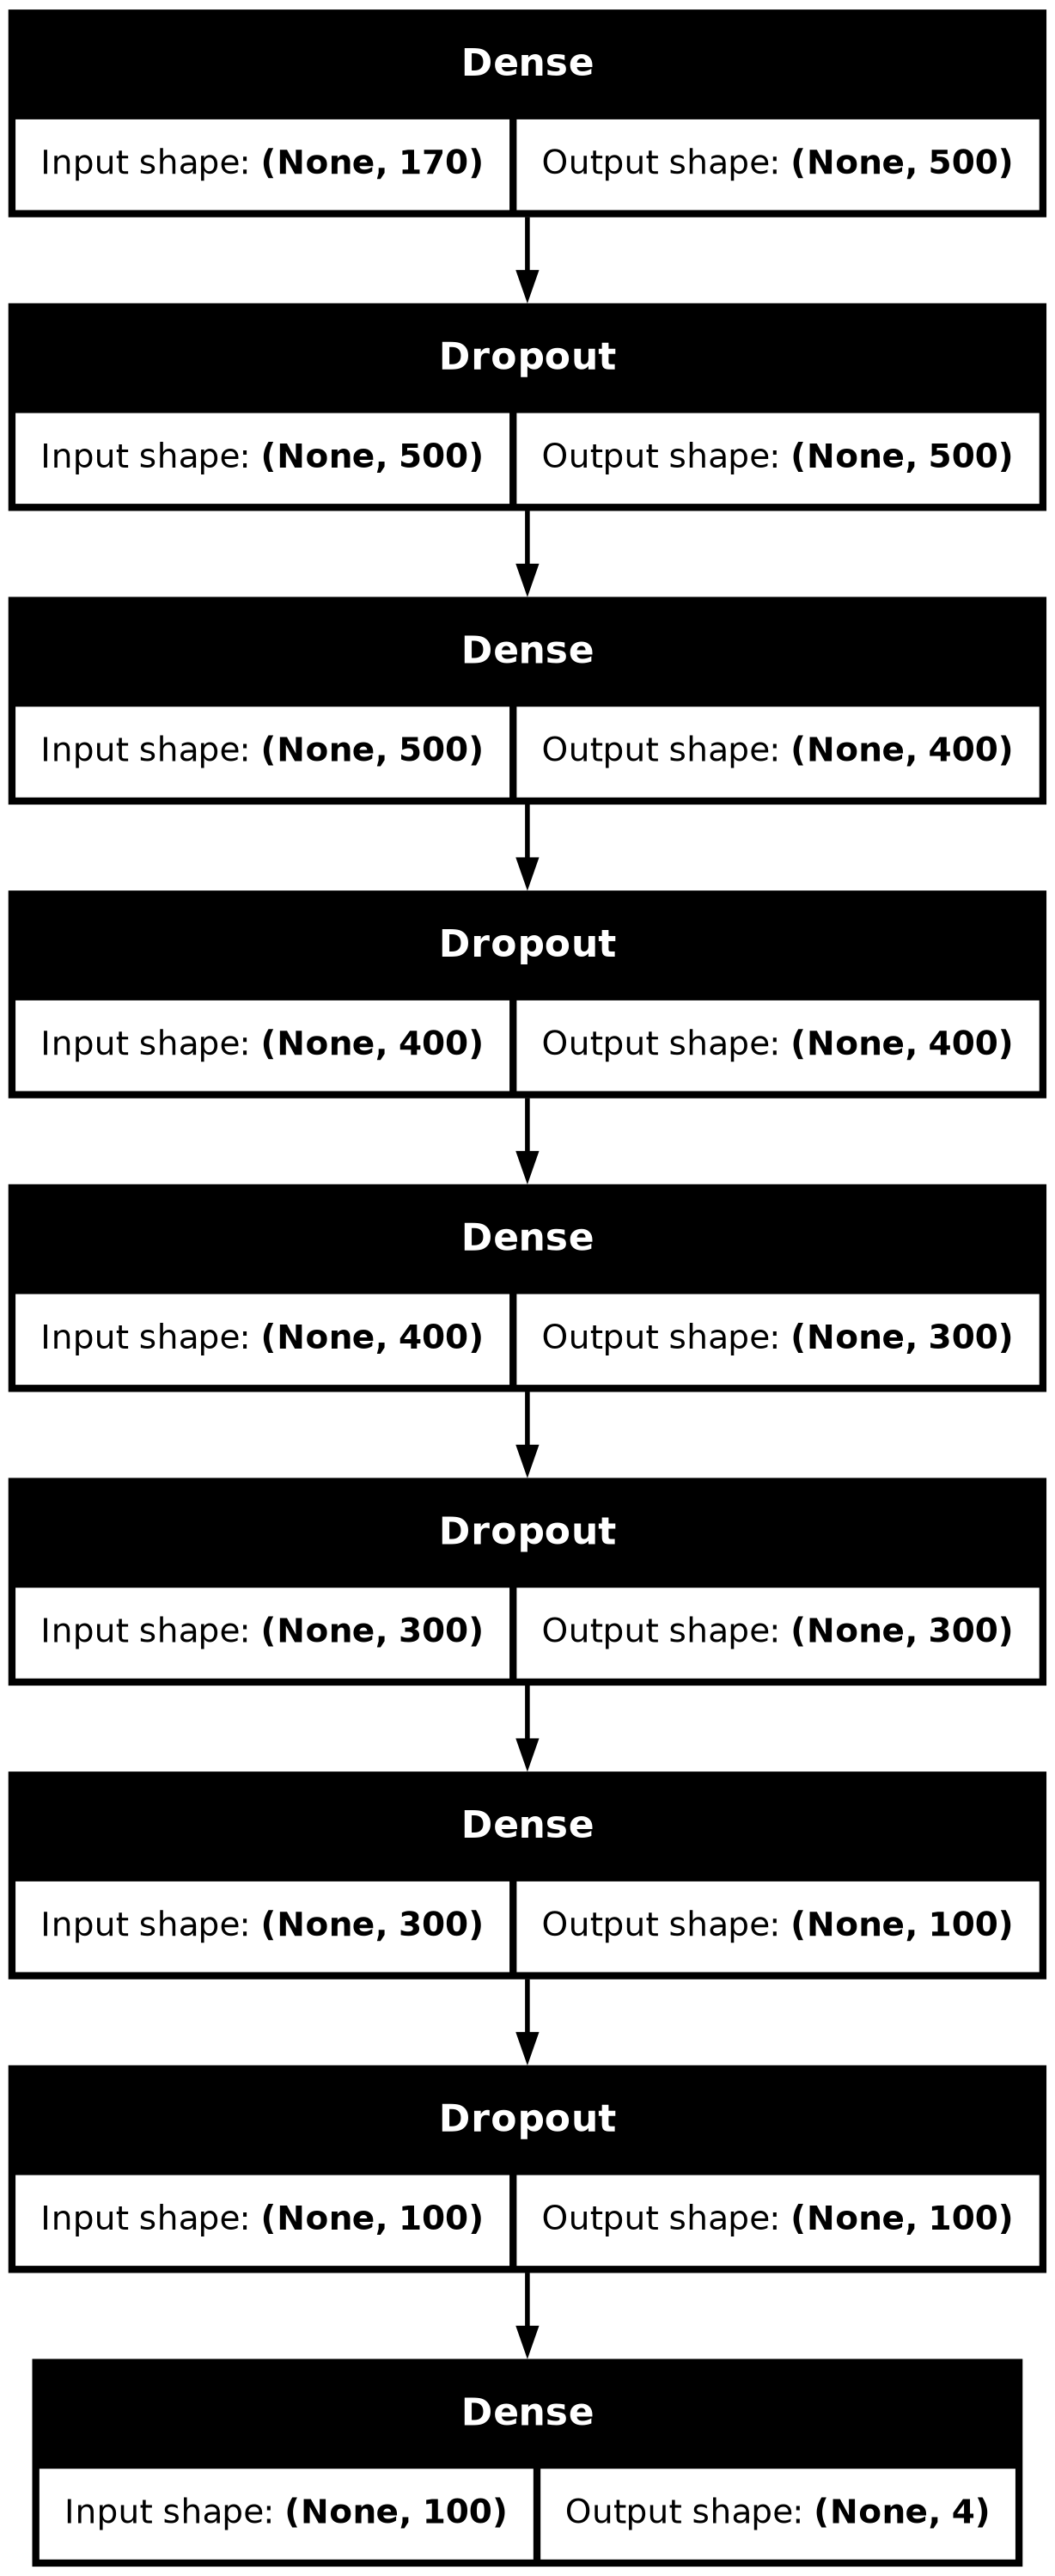

In [29]:
history_1 = model_1.fit(
    X_train, y_train, 
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=False
)
plot_model(model_1, show_shapes=True)

In [30]:
model_1.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 500)            │        85,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,310,114 (5.00 MB)

 Trainable params: 436,704 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 873,410 (3.33 MB)

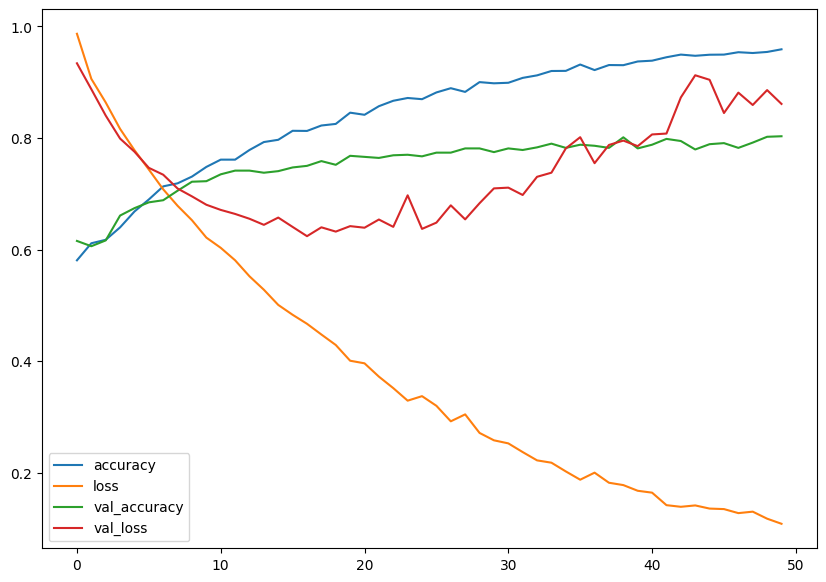

In [31]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [32]:
model_1.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7864 - loss: 0.9641   


[0.8609381914138794, 0.8030303120613098]

In [33]:
features = unknown_data.drop(labels=["Lowest distortion"], axis=1)
predictions = model_1.predict(features).argmax(axis=1)
prediction_df = pd.DataFrame(columns=["Compound", "Prediction"])
i = 0
for row in features.iterrows():
    row_index = row[0]
    item_dict = {'Compound': [unprocessed_data.iloc[row_index]["Compound"]], 'Prediction': [class_names[predictions[i]]]}
    item = pd.DataFrame(item_dict)
    prediction_df = pd.concat([prediction_df, item], ignore_index=True)
    i += 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


In [34]:
prediction_df

,Compound,Prediction
0,Ca2O3,cubic
1,CeCsO3,cubic
2,CoCsO3,rhombohedral
3,CrCsO3,cubic
4,CsCoO3,cubic
5,CsCrO3,cubic
6,CsMnO3,cubic
7,CsNiO3,cubic
8,DyCsO3,orthorhombic
9,FeInO3,cubic


## Trying more with Neural Networks

In [35]:
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(500, activation='relu', name='layer1'),
    tf.keras.layers.Dropout(0.4, name='drop1'),
    tf.keras.layers.Dense(400, activation='relu', name='layer2'),
    tf.keras.layers.Dropout(0.4, name='drop2'),
    tf.keras.layers.Dense(200, activation='relu', name='layer3'),
    tf.keras.layers.Dropout(0.4, name='drop3'),
    tf.keras.layers.Dense(100, activation='relu', name='layer4'),
    tf.keras.layers.Dropout(0.4, name='drop4'),
    tf.keras.layers.Dense(4, activation='softmax', name='output_layer')
], name='Model_1')

In [36]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["accuracy"]
)

In [37]:
history = model.fit(
    X_train, y_train, 
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=False
)

In [38]:
model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7922 - loss: 1.1760   


[1.0892071723937988, 0.7916666865348816]

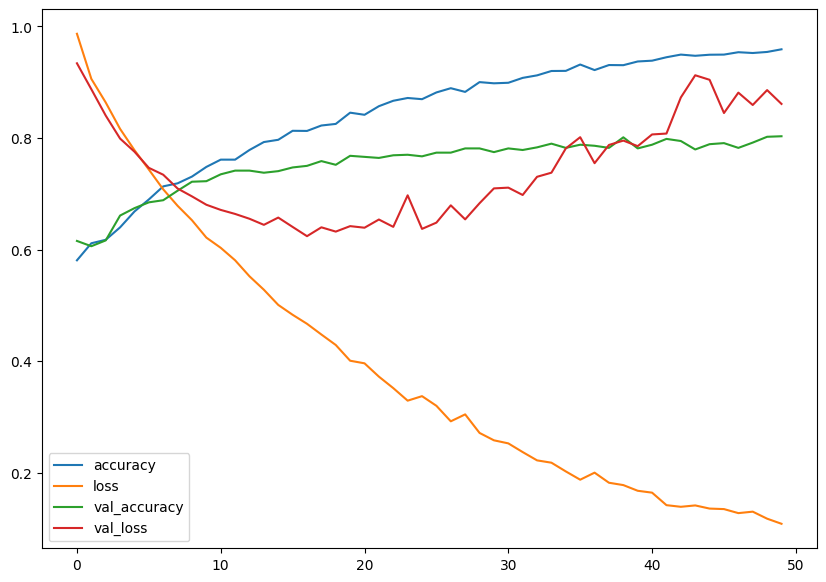

In [39]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [40]:
print(model_1.metrics_names)

['loss', 'compile_metrics']


Trying Normalization

In [41]:
model_1.save("model_1.h5")